In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/DiwaliSalesData.csv', encoding='latin-1')

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [ ]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df.rename(columns = {'Marital_Status':'Shaadi'},inplace=True)

In [ ]:
df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# **GENDER**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

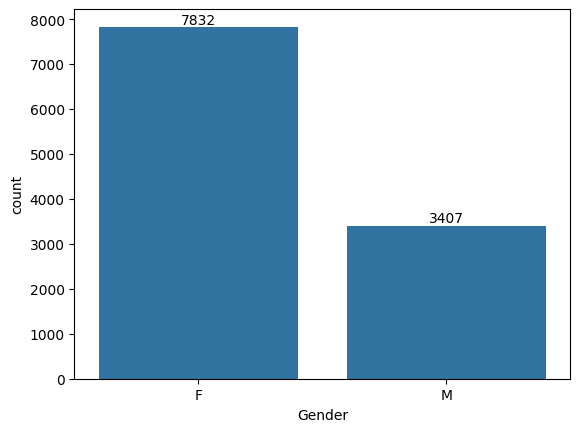

In [ ]:
ax = sns.countplot(x = 'Gender',data = df)
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

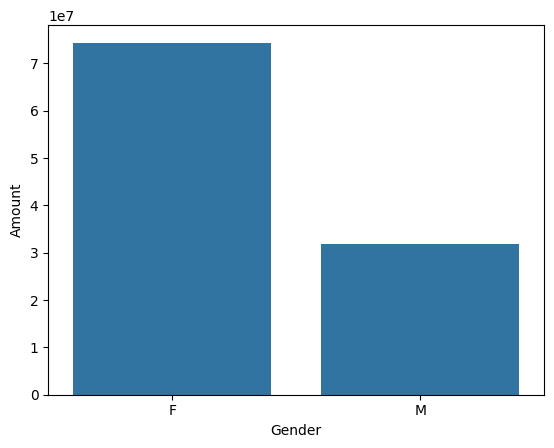

In [ ]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y='Amount',data = sales_gen)

From Above graphs its seen that female purchased more than males

# ***AGE***

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

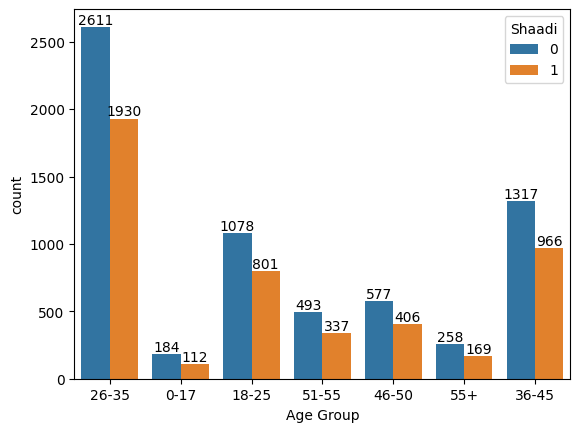

In [ ]:
ax = sns.countplot(x = 'Age Group',data = df,hue='Shaadi')
#hue seperates male and females based on Married or not
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

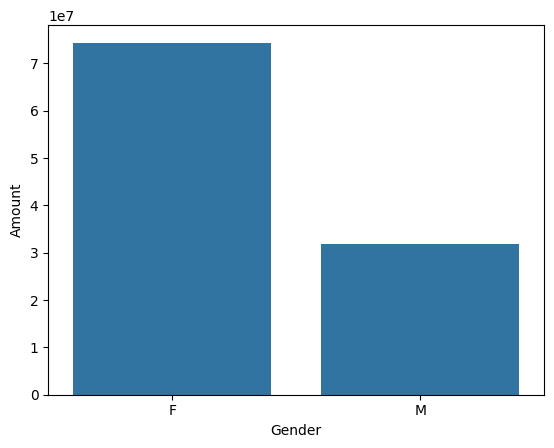

In [ ]:

sns.barplot(x = 'Gender',y='Amount',data = sales_age)

26-35 Age Group of women spends most amount

In [ ]:
df.groupby(['Age Group','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

,Age Group,Gender,Amount
4,26-35,F,30963953
6,36-45,F,15509956
2,18-25,F,11887003
5,26-35,M,11649489
8,46-50,F,6743393
7,36-45,M,6635038
10,51-55,F,5385208
3,18-25,M,5353729
11,51-55,M,2876269
9,46-50,M,2464451


<Axes: xlabel='Age Group', ylabel='Gender'>

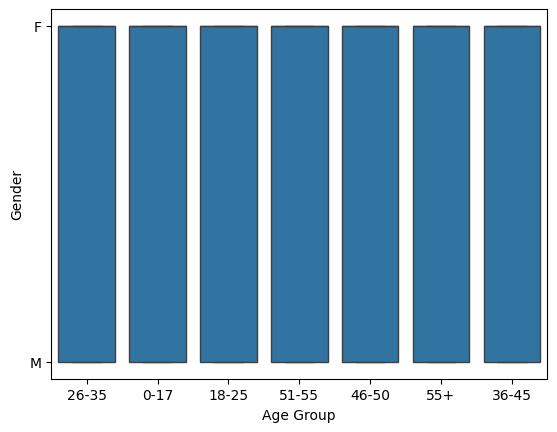

In [ ]:
sns.boxplot(y='Gender',x='Age Group',data=df)

In [ ]:
new_df = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)

In [ ]:

new_df['Amount'] = new_df['Amount']/1000000
new_df

,State,Amount
14,Uttar Pradesh,0.000019
10,Maharashtra,0.000014
7,Karnataka,0.000014
2,Delhi,0.000012
9,Madhya Pradesh,0.000008
0,Andhra Pradesh,0.000008
5,Himachal Pradesh,0.000005
4,Haryana,0.000004
1,Bihar,0.000004
3,Gujarat,0.000004


<Axes: xlabel='State', ylabel='Amount'>

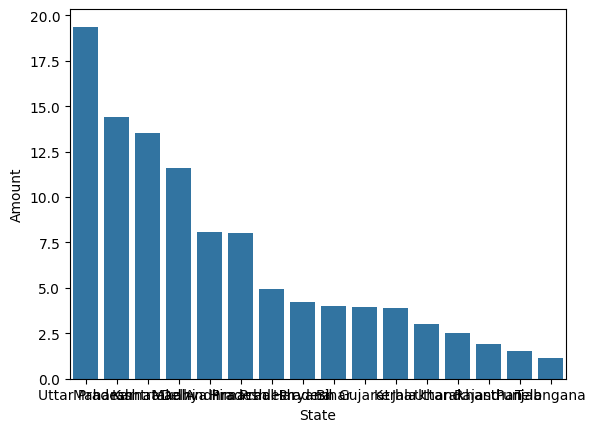

In [ ]:
sns.barplot(x='State',y='Amount',data=new_df)

Most Amount of money was generated from UP and Maharashtra

Least Amount of money was generated from Telangana


In [ ]:
new_df = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False)

In [ ]:
new_df


,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


Most Orders from UP & Least from Telangana

Further Hot Label Encoding can be done to seperate diff types of data like gender in two columns M and F like that

**SO WE ARE DONE WITH EDA**